In [5]:
import numpy as np
import matplotlib.pyplot as plt # Buat Least Square Regression

# **Gauss-Seidel Linear Equation**

#### NOTES
Punya 2 main function :
1. is Diag_Dominan ( 1 param)
2. Gauss Seidel (2 param input, dan 2 param diketahui)

Print :
1. Print true/false Diag_dom 
2. Print true/false convergent dari func gauss_seidel



In [2]:

# Diag Dominant, Covergent
xs =[
    [6,3,2],
    [2,7,3],
    [7,5,15]
]

ys = [
    15,
    6,
    12
]

In [3]:
def diagonally_dominant(x):
    x = np.array(x) # Buat jadi numpy array
    diag = np.array(np.diag(np.abs(x))) #Ambil diagonal dari matrix dan diabsolutin
    sum = np.sum(np.array(np.abs(x)),axis = 1) # Axis = 1 biar ada jumlahnya per row
    sum_without_diag = sum - diag # Cari Jumlah yg tidak termasuk diagonal

    if(np.all(diag > sum_without_diag)): # Validasi Diagonal Dominan
        return True
    else:
        return False
    
diagonally_dominant(xs)

True

In [4]:
def gauss_seidel(x,y,error = 0.015, max = 20):
    x = np.array(x)
    y = np.array(y)

    n_old = np.zeros(len(x[0])) #inisialisasi semua result dengan 0

    diag = np.diag(x) # Ambil diagonal persamaan
    x = -x # Buat pindahin ruas
    np.fill_diagonal (x,0) # Diagonal di nolin

    for t in range(max):
        n_new = np.array(n_old) #buat array baru untuk menampung hasil
        
        for i in range (len(x)):
            n_new[i] = (y[i] + np.dot(x[i], n_new)) / diag[i] #Update nilai Result

        print("iteration: ", t+1, n_new)

        eucledian = np.sqrt(np.dot(n_new - n_old, n_new - n_old))
        if (eucledian <error):
            return True
        
        n_old = n_new

    return False

if(diagonally_dominant(xs)):
    print("Diagonally Dominant")
else:
    print("Not Diagonally Dominant")

    
if(gauss_seidel(xs,ys)):
    print("Convergent")
else:
    print("Not Convergent")



Diagonally Dominant
iteration:  1 [ 2.5         0.14285714 -0.41428571]
iteration:  2 [ 2.56666667  0.30136054 -0.49823129]
iteration:  3 [ 2.51539683  0.35198575 -0.49118043]
iteration:  4 [ 2.48773394  0.35686763 -0.47989838]
iteration:  5 [ 2.48153231  0.35380436 -0.4759832 ]
Convergent


# **Least Square Regression**

![image.png](attachment:image.png)

Rumus Least Square Regression
- alpha[0] = m
- alpha[1] = b

alpha =  [[0.46428571]
 [4.28571429]]


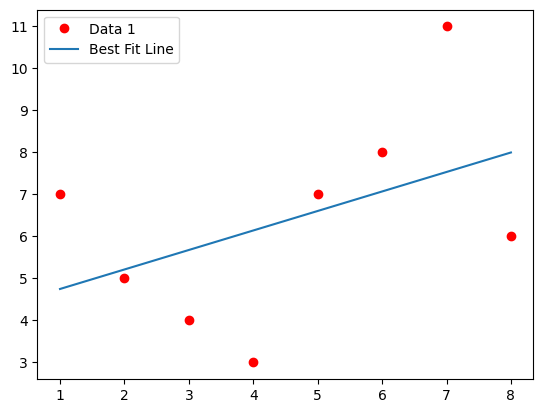

In [9]:
x = [1, 2, 3, 4, 5, 6, 7, 8]
y = [7, 5, 4, 3, 7, 8, 11, 6]

x = np.array(x)
y = np.array(y)

A = np.vstack((x,np.ones(len(x)))).T
y = y[:,np.newaxis]
# print("y = ", y)


# alpha = Schet
alpha = np.dot(np.dot(np.linalg.inv(np.dot(A.T,A)),A.T),y)
print("alpha = ", alpha)

plt.plot(x,y,'ro',label='Data 1')
plt.plot(x,alpha[0]*x+alpha[1],label='Best Fit Line')
plt.legend()
plt.show()

# **Riemann Integral**

In [20]:
# Varibel yg dibutuhkan 

# fx = x^2 - 5
# Integral fx, 2 < x < 5

a = 2 # Batas Minimum integral
b = 5 # Batas Maks Integral
n = 5 # Jumlah titik

w = (b-a) / (n-1) #Lebar Kotak
x = np.linspace(a,b,n) #Titik Koordinat untuk tiap lebar 1 kotak, merupakan Numpy array bukan std.array
# y = f(x) , Fungsi yg akan digunakan

print("x = ",x)

# Our Function
def f(x):
    return x**2-5

print("Height y = ",f(x))

x =  [2.   2.75 3.5  4.25 5.  ]
Height y =  [-1.      2.5625  7.25   13.0625 20.    ]


In [21]:
# LEFT RIEMANN 
LeftR = w * sum(f(x)[:n-1]) # [:n-1] slicing


# RIGHT RIEMANN 
RightR = w * sum(f(x)[1:]) 


# MID RIEMANN  # Cari titik midpoint untuk setiap titik
xmid = (x[1:] + x[:n-1]) /2 # TItik Kiri - kanan bagi 2
midR = w*sum(f(xmid))


print(LeftR)
print(RightR)
print(midR)

16.40625
32.15625
23.859375


# **Newton-Rhapson Root Finding**

In [16]:
import numpy as np

def f(x):
    return x**2 - 2*x - 3  # Function whose root we want to find

def g(x):
    return 2*x - 2  # Derivative of the function

def newton_raphson(x0, tolerance, max_iterations=1000):
    x1 = x0
    for i in range(max_iterations):
        x1 = x0 - f(x0) / g(x0)
        print(f'Iteration = {i+1} ; Root = {x1} ; f(x1) = {f(x1)}')

        if np.abs(f(x1)) < tolerance:
            print("Converged to root:", x1)
            return x1

        x0 = x1
    
    # Validation: If we reach here, it means we did not converge within the maximum number of iterations
    print("Did not converge within the maximum number of iterations")
    return None

# Example usage
root = newton_raphson(2, 0.015)
if root is not None:
    print(f"The root is: {root}")
else:
    print("Failed to find a root.")


Iteration = 1 ; Root = 3.5 ; f(x1) = 2.25
Iteration = 2 ; Root = 3.05 ; f(x1) = 0.2024999999999988
Iteration = 3 ; Root = 3.0006097560975613 ; f(x1) = 0.0024393961927433594
Converged to root: 3.0006097560975613
The root is: 3.0006097560975613
